# Systematic Minority Oversampling Technique (SMOTE)

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [70]:
ds=pd.read_csv("Pima_Indian_Diabetes.csv", header=0, names=range(0,8))
ds.head()

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [71]:
df=pd.DataFrame(data=ds)
df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [72]:
dfx=df.iloc[:,0:7]
dfx

,0,1,2,3,4,5,6
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [73]:
dfy=df.iloc[:,-1]
dfy

1     0
8     1
1     0
0     1
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 767, dtype: int64

In [74]:
dfy.value_counts()

0    500
1    267
Name: 7, dtype: int64

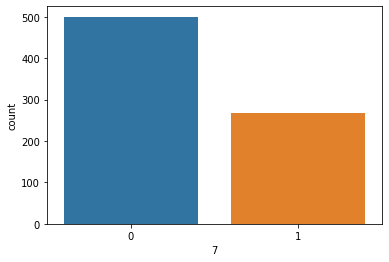

In [75]:
sns.countplot(dfy)

In [76]:
import sklearn
sklearn.__version__

'1.0.2'

In [77]:
import numpy
numpy.__version__

'1.19.4'

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smt=SMOTE()

In [80]:
trainx,trainy=smt.fit_resample(dfx,dfy)

In [81]:
trainx.value_counts()

0    1   2   3    4          5         6 
0    48  20  0    24.700000  0.140000  22    1
138  64  27  132  33.795713  0.491338  27    1
137  40  35  168  43.100000  2.288000  33    1
     46  35  167  40.284563  1.707026  29    1
     57  0   0    26.331178  0.433020  22    1
                                            ..
109  38  18  120  23.100000  0.407000  26    1
     56  21  135  25.200000  0.833000  23    1
     58  18  116  28.500000  0.219000  22    1
     60  8   182  25.400000  0.947000  21    1
199  76  43  0    42.900000  1.394000  22    1
Length: 1000, dtype: int64

In [82]:
trainy.value_counts()

0    500
1    500
Name: 7, dtype: int64

In [83]:
trainy

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: 7, Length: 1000, dtype: int64

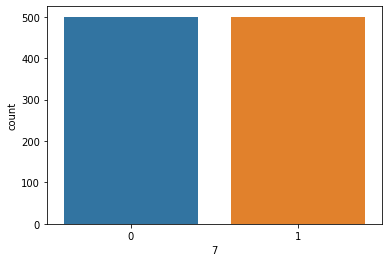

In [84]:
sns.countplot(trainy)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train_x,test_x,train_y,test_y=train_test_split(trainx,trainy,test_size=.10,random_state=42)

In [87]:
train_x.shape

(900, 7)

In [88]:
train_y.shape

(900,)

In [89]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
lg.score(train_x,train_y)

0.7433333333333333

In [90]:
pred=lg.predict(test_x)

In [91]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(test_y,pred),2))

0.82


In [93]:
dfiris=pd.read_csv('iris.csv')
dfiris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
dfiris.sample(3)

,sepal length,sepal width,petal length,petal width,class
55,5.7,2.8,4.5,1.3,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor


In [95]:
dfiris['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

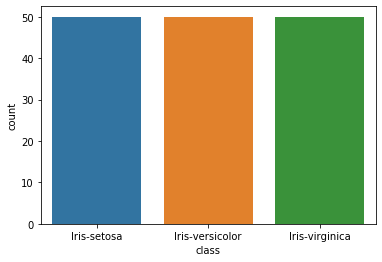

In [96]:
sns.countplot(dfiris['class'])

In [97]:
dfwine=pd.read_csv('winequality-red.csv')
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [98]:
dfwine.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
817,10.8,0.29,0.42,1.6,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,6
1336,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
1303,8.0,0.28,0.44,1.8,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,5


In [99]:
dfwine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

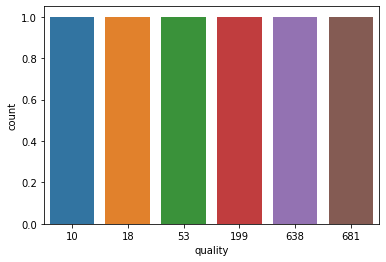

In [100]:
sns.countplot(dfwine['quality'].value_counts())

In [101]:
x=dfwine.iloc[:,0:-1]
y=dfwine.iloc[:,-1]

In [102]:
x.shape

(1599, 11)

In [103]:
y.shape

(1599,)

In [104]:
from imblearn.over_sampling import SMOTE
sme=SMOTE()
x_trainw,y_trainw=sme.fit_resample(x,y)

In [105]:
x_trainw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,7.909643,0.554550,0.112427,2.280065,0.065897,34.398703,46.445298,0.994187,3.436078,0.734518,12.655146
4082,10.506774,0.363112,0.516888,2.593099,0.070414,5.207028,16.069009,0.996865,3.153450,0.654831,11.144920
4083,10.847762,0.584087,0.642068,4.987182,0.084936,7.197102,21.394204,0.998600,3.237291,0.712612,13.320193
4084,8.951627,0.468640,0.411360,2.537558,0.073747,6.873256,16.624419,0.994172,3.181221,0.693709,12.311279


In [106]:
y_trainw

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [107]:
x_trainw.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH        sulphates  alcohol  
10.700000      0.350000          0.530000     2.600000        0.070000   5.000000             16.000000             0.997200  3.150000  0.650000   11.000000    19
7.200000       0.360000          0.460000     2.100000        0.074000   24.000000            44.000000             0.995340  3.400000  0.850000   11.000000    15
5.600000       0.660000          0.000000     2.200000        0.087000   3.000000             11.000000             0.993780  3.710000  0.630000   12.800000     5
6.700000       0.280000          0.280000     2.400000        0.012000   36.000000            100.000000            0.990640  3.260000  0.390000   11.700000     5
8.900000       0.120000          0.450000     1.800000        0.075000   10.000000            21.000000             0.995520  3.410000  0.760000   11.900000     5
                            

In [108]:
y_trainw.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

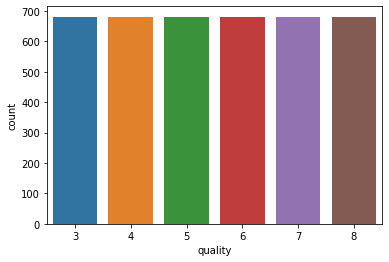

In [109]:
sns.countplot(y_trainw)

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [114]:
train_x,test_x,train_y,test_y=train_test_split(x_trainw,y_trainw,test_size=.40,random_state=50)
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.764525993883792
[[266   1   2   2   1   0]
 [  6 205  23  14   3   0]
 [  8  38 147  71   5   1]
 [  6  22  64 145  31  10]
 [  0   0  17  27 221  14]
 [  0   0   1   0  18 266]]
              precision    recall  f1-score   support

           3       0.93      0.98      0.95       272
           4       0.77      0.82      0.79       251
           5       0.58      0.54      0.56       270
           6       0.56      0.52      0.54       278
           7       0.79      0.79      0.79       279
           8       0.91      0.93      0.92       285

    accuracy                           0.76      1635
   macro avg       0.76      0.76      0.76      1635
weighted avg       0.76      0.76      0.76      1635

